In [1]:
import tensorflow as tf
import os

In [2]:
tf.__version__

'2.14.0'

In [3]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_8292\2622808212.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
img = cv2.imread(os.path.join('data', 'handwriting', '3FrHandwritingFormulemenu.JPG.jpg'))

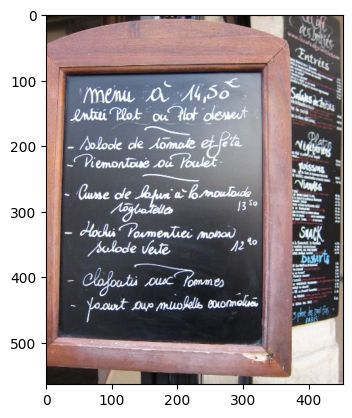

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
help(tf.data.Dataset)

# tf.data.Dataset??

Help on class DatasetV2 in module tensorflow.python.data.ops.dataset_ops:

class DatasetV2(collections.abc.Iterable, tensorflow.python.trackable.base.Trackable, tensorflow.python.framework.composite_tensor.CompositeTensor, tensorflow.python.types.data.DatasetV2)
 |  DatasetV2(variant_tensor)
 |  
 |  Represents a potentially large set of elements.
 |  
 |  The `tf.data.Dataset` API supports writing descriptive and efficient input
 |  pipelines. `Dataset` usage follows a common pattern:
 |  
 |  1. Create a source dataset from your input data.
 |  2. Apply dataset transformations to preprocess the data.
 |  3. Iterate over the dataset and process the elements.
 |  
 |  Iteration happens in a streaming fashion, so the full dataset does not need to
 |  fit into memory.
 |  
 |  Source Datasets:
 |  
 |  The simplest way to create a dataset is to create it from a python `list`:
 |  
 |  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
 |  >>> for element in dataset:
 |  ...   pr

In [10]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [62]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 603 files belonging to 2 classes.


In [63]:
data_iterator = data.as_numpy_iterator()

In [64]:
batch = data_iterator.next()

In [65]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [66]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

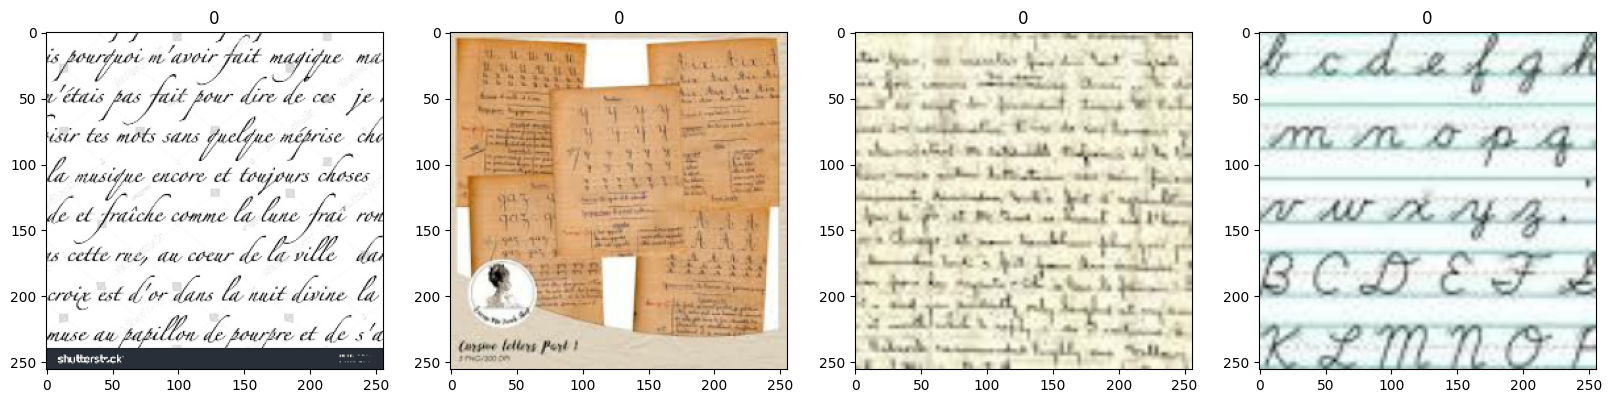

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][10:14]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 2. Preprocess Data

2.1 Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

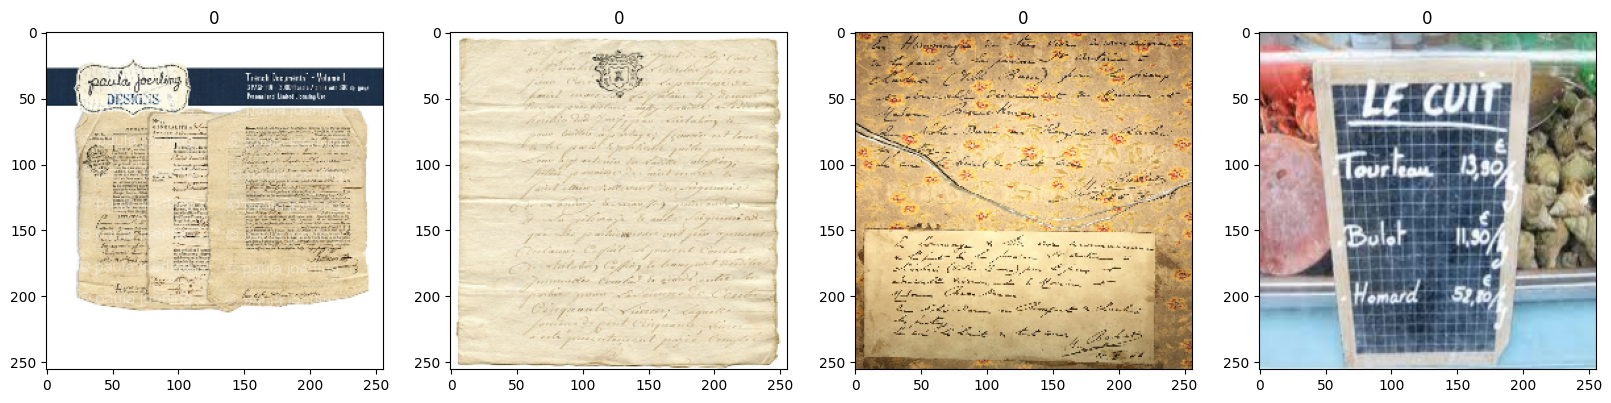

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [21]:
batch[0].max()

1.0

2.2 Split Data

In [22]:
len(data)

19

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [24]:
train_size, val_size, test_size

(13, 4, 2)

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
len(train),len(val),len(test)

(13, 4, 2)

### 3. Deep Model

3.1 Build Deep Learning Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

3.2 Train

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5


13/13 [==============================] - 13s 869ms/step - loss: 0.3887 - accuracy: 0.9567 - val_loss: 0.2792 - val_accuracy: 0.9375
Epoch 2/5
13/13 [==============================] - 12s 845ms/step - loss: 0.2257 - accuracy: 0.9519 - val_loss: 0.2330 - val_accuracy: 0.9453
Epoch 3/5
13/13 [==============================] - 12s 859ms/step - loss: 0.1971 - accuracy: 0.9615 - val_loss: 0.2974 - val_accuracy: 0.9297
Epoch 4/5
13/13 [==============================] - 13s 937ms/step - loss: 0.1912 - accuracy: 0.9519 - val_loss: 0.1853 - val_accuracy: 0.9531
Epoch 5/5
13/13 [==============================] - 12s 864ms/step - loss: 0.1739 - accuracy: 0.9543 - val_loss: 0.2158 - val_accuracy: 0.9453


In [35]:
hist

In [36]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25


13/13 [==============================] - 12s 870ms/step - loss: 0.1763 - accuracy: 0.9543 - val_loss: 0.2592 - val_accuracy: 0.9453
Epoch 2/25
13/13 [==============================] - 12s 861ms/step - loss: 0.1842 - accuracy: 0.9591 - val_loss: 0.2691 - val_accuracy: 0.9297
Epoch 3/25
13/13 [==============================] - 12s 864ms/step - loss: 0.1498 - accuracy: 0.9615 - val_loss: 0.2142 - val_accuracy: 0.9609
Epoch 4/25
13/13 [==============================] - 12s 898ms/step - loss: 0.1770 - accuracy: 0.9591 - val_loss: 0.1914 - val_accuracy: 0.9531
Epoch 5/25
13/13 [==============================] - 13s 909ms/step - loss: 0.1669 - accuracy: 0.9519 - val_loss: 0.1808 - val_accuracy: 0.9609
Epoch 6/25
13/13 [==============================] - 13s 946ms/step - loss: 0.1287 - accuracy: 0.9688 - val_loss: 0.1442 - val_accuracy: 0.9766
Epoch 7/25
13/13 [==============================] - 12s 882ms/step - loss: 0.1705 - accuracy: 0.9663 - val_loss: 0.1424 - val_accuracy: 0.9688
Epoch 8/25

3.3 Plot Performance

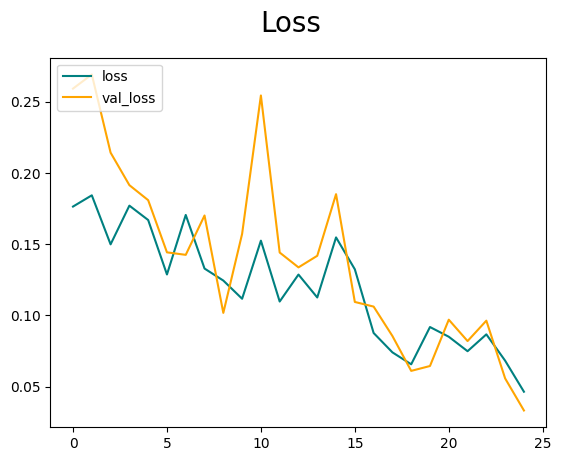

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 4. Evaluate Performance

4.1 Evaluate

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 175ms/step


In [41]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:0.6666666865348816, Recall:1.0, Accuracy:0.9830508232116699


4.2 Test

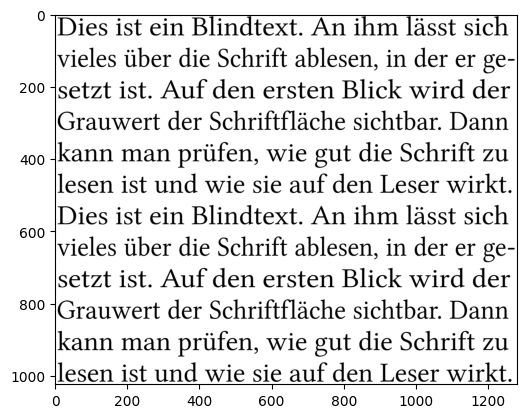

In [69]:
img = cv2.imread("text_test.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

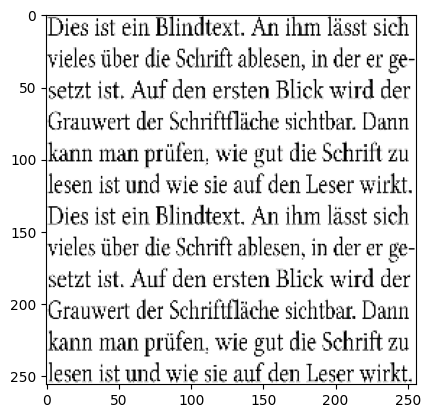

In [76]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [77]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [78]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 61ms/step


In [79]:
yhat

array([[3.9244618e-23]], dtype=float32)

In [80]:
if yhat > 0.5:
    print(f"Predicted class is Handwritten")
else:
    print(f"Predicted class is Text")

Predicted class is Text
